In [930]:
%matplotlib inline

import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import itertools
sys.path.append("/Users/yves/Documents/Code/structural_knowledge/action_generalisation/")

import torch as tf

In [931]:

def make_matrix_from(maze):
    
    def in_maze(s):
        return s[0] >= 0 and s[0] < maze.shape[0] and s[1] >= 0 and s[1] < maze.shape[1]

    def is_free(s):
        return maze[s[0],s[1]] == 1

    def valid_state(s):
        return in_maze(s) and is_free(s)
    
    states = [np.array(s) for s in itertools.product(range(maze.shape[0]), range(maze.shape[1])) if maze[s[0], s[1]] == 1]
    Ta = np.eye(len(states))
    idx = np.zeros(maze.shape, dtype=np.int)
    c = 0
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                continue
            idx[i, j] = c
            c += 1
    
    for i, state in enumerate(states):
        possible_next_states = [state + d for d in np.array([[1,0],[-1,0],[0,1],[0,-1]])]
        filtered = list(filter(valid_state, possible_next_states))
        for f in filtered:
            Ta[i, idx[f[0], f[1]]] = 1
            Ta[idx[f[0], f[1]], i] = 1
    return Ta, idx


In [938]:
def eig_sort(M):
    eigenval,v = np.linalg.eig(M)
    v = v[:,np.argsort((eigenval))[::-1]]
    eigenval = eigenval[np.argsort((eigenval))[::-1]]
    return eigenval,v

In [939]:
import env_gen

In [940]:
Nx = 10
Ny = 10
M = env_gen.generate_random_connected_maze(Nx,Ny,100)

In [941]:
#M = np.zeros([10,100])
#M[0] = 1

In [942]:
M = np.ones([Nx,Ny])

In [943]:
T,idx = make_matrix_from(M)
T[np.diag_indices_from(T)] = 0
T = T/np.sum(T,axis=1)[None,:]

In [944]:
eigenval,v = np.linalg.eig(T)

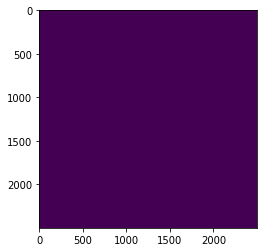

In [948]:
plt.imshow(T)

In [945]:
e2,V2 = eig_sort(L2)


NameError: name 'L2' is not defined

In [949]:
eigenval,v = np.linalg.eig(T)
v = v[:,np.argsort((eigenval))[::-1]]
eigenval = eigenval[np.argsort((eigenval))[::-1]]

In [950]:
def gen_star_graph(n=0):
    n=5
    edges = [[0,1],[0,2],[0,3],[0,4]]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

In [951]:
import networkx as nx


In [952]:
A,D,L = gen_star_graph()

In [953]:
A

array([[0., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

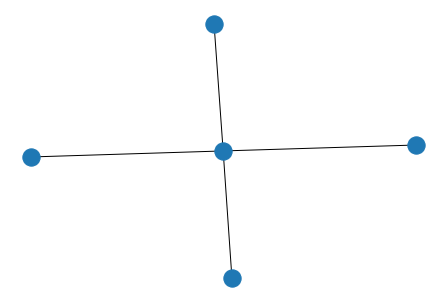

In [954]:
nx.draw(nx.from_numpy_array(A))

In [955]:
T = A/np.sum(A,axis=1)

In [956]:
M = np.zeros([3,3])
M[:,1] = 1
M[1,:] = 1
#M[2,2] = 1
#M[2]

idx = np.zeros([3,3],dtype='int')
idx[0,1] = 2
idx[2,1] = 1
idx[1,1] = 0
idx[1,0] = 4
idx[1,2] = 3

In [957]:
idx

array([[0, 2, 0],
       [4, 0, 3],
       [0, 1, 0]])

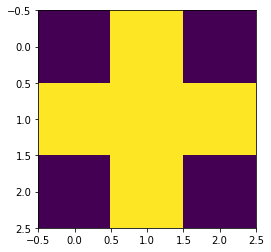

In [958]:
plt.imshow(M)

In [959]:
T.shape

(5, 5)

In [960]:
gamma = 0.9
SR = np.linalg.inv(np.eye(T.shape[0]) - gamma * T)


eigenval,v = np.linalg.eig(SR)
v = v[:,np.argsort((eigenval))[::-1]]
eigenval = eigenval[np.argsort((eigenval))[::-1]]

In [961]:
v.shape

(5, 5)

In [962]:
ev_draw = np.zeros_like(M)
Nx,Ny = M.shape
for i in range(Nx):
    for j in range(Ny):
        #ix = np.where(idx=)
        ev_draw[i,j] = v[:,0][idx[i,j]]

<ipython-input-962-830c989a2bba>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  ev_draw[i,j] = v[:,0][idx[i,j]]


In [963]:
fin = np.ma.masked_where(idx==0,ev_draw)

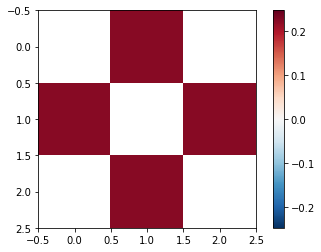

In [964]:
fin = np.ma.masked_where(idx==0,ev_draw)
mx = mn = np.max(np.abs(fin))*1.1
plt.imshow(fin,vmax=mx,vmin=-mx,cmap='RdBu_r')
plt.colorbar()

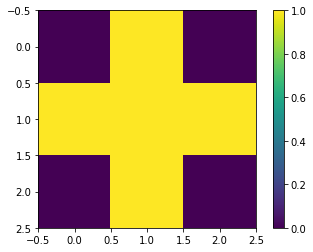

In [965]:
plt.imshow(M)
plt.colorbar()

In [966]:
lamda = .99
alpha=.5

In [967]:
pos = 10  #current position

e = np.zeros(len(SR)) +1 #eligibility trace
rg = np.arange(len(SR))  #
walk_path = []

SRTD = np.zeros_like(SR)

for i in range(100000):
    
    #updates eligibility traces
    #e[pos] = lamda*gamma*e[pos] + 1
    #e[np.isin(rg,pos)==False] = lamda*gamma*e[pos]  #gives boolean vetor true at current location
    #e 
    #available options
    options = np.where(T[:,pos])[0]

    newP = np.random.choice(options,p=T[:,pos][options])
    walk_path.append(newP)
    zrs = np.zeros(len(SR))
    zrs[pos] = 1.
    SRTD[pos,:] = SRTD[pos,:] + alpha*(zrs + gamma*SRTD[newP,:] - SRTD[pos,:])*e
    SRTD = (SRTD + SRTD.T)/2.
    pos = newP.copy()

IndexError: index 10 is out of bounds for axis 1 with size 5

In [800]:


eigenval,v = np.linalg.eig(SRTD)
v = v[:,np.argsort((eigenval))[::-1]]
eigenval = eigenval[np.argsort((eigenval))[::-1]]

In [801]:
ev_draw = np.zeros_like(M)
Nx,Ny = M.shape
for i in range(Nx):
    for j in range(Ny):
        #ix = np.where(idx=)
        ev_draw[i,j] = v[:,2][idx[i,j]]

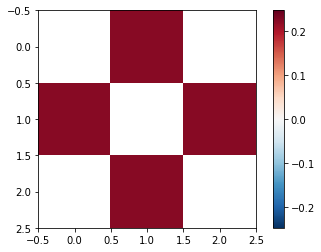

In [968]:
fin = np.ma.masked_where(idx==0,ev_draw)
mx = mn = np.max(np.abs(fin))*1.1
plt.imshow(fin,vmax=mx,vmin=-mx,cmap='RdBu_r')
plt.colorbar()